In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from simpledbf import Dbf5

In [2]:
# read in dbf to pandas dataframe
file = 'C:/users/andrewm4/Documents/Hydro_572/GitHub/G572McHenryCountyGWModel/GISuploads/hydraulic_conductivity.dbf'
dbf = Dbf5(file)
df = dbf.to_dataframe()
df.head()

,row,column,node,Zone1,Kx1,Ky1,Kz1,Zone2,Kx2,Ky2,...,Ky8,Kz8,Zone9,Kx9,Ky9,Kz9,Zone10,Kx10,Ky10,Kz10
0,1,1,0,73,2.52832,2.52832,0.043545,73,2.52832,2.52832,...,2.52832,0.043545,23,1.3507,1.3507,0.043406,23,1.3507,1.3507,0.043406
1,1,2,0,73,2.52832,2.52832,0.043545,73,2.52832,2.52832,...,2.52832,0.043545,23,1.3507,1.3507,0.043406,23,1.3507,1.3507,0.043406
2,1,3,0,73,2.52832,2.52832,0.043545,73,2.52832,2.52832,...,2.52832,0.043545,23,1.3507,1.3507,0.043406,23,1.3507,1.3507,0.043406
3,1,4,0,73,2.52832,2.52832,0.043545,73,2.52832,2.52832,...,2.52832,0.043545,23,1.3507,1.3507,0.043406,23,1.3507,1.3507,0.043406
4,1,5,0,73,2.52832,2.52832,0.043545,73,2.52832,2.52832,...,2.52832,0.043545,23,1.3507,1.3507,0.043406,23,1.3507,1.3507,0.043406


In [3]:
# create dataframes of the 10 zones, Kx, Ky, and Kz

zone = df[df.columns[pd.Series(df.columns).str.contains("Z")]]
x = df[df.columns[pd.Series(df.columns).str.contains("x")]]
y = df[df.columns[pd.Series(df.columns).str.contains("y")]]
z = df[df.columns[pd.Series(df.columns).str.contains("z")]]

zone

,Zone1,Zone2,Zone3,Zone4,Zone5,Zone6,Zone7,Zone8,Zone9,Zone10
0,73,73,73,73,73,73,73,73,23,23
1,73,73,73,73,73,73,74,73,23,23
2,73,73,73,73,73,73,74,73,23,23
3,73,73,73,73,73,73,74,73,23,23
4,73,73,73,73,73,73,74,73,23,23
...,...,...,...,...,...,...,...,...,...,...
46120,74,74,73,74,74,74,74,74,74,15
46121,74,74,73,74,74,74,74,74,74,15
46122,74,74,73,74,74,74,74,74,74,15
46123,74,74,73,74,74,74,74,74,74,15


In [4]:
# define the function that converts data frame to array; reshapes it and saves as variable
# 3D array of 10 layers by 205 rows by 225 columns
def array_shaper(j):
    j = j.to_numpy()
    j = np.reshape(j, (205,225,10))
    return j

In [5]:
# save function output to variables
zone_reshaped = array_shaper(zone)
x_reshaped = array_shaper(x)
y_reshaped = array_shaper(y)
z_reshaped = array_shaper(z)

In [6]:
# check shape

print(zone_reshaped.shape)
print(x_reshaped.shape)
print(y_reshaped.shape)
print(z_reshaped.shape)

(205, 225, 10)
(205, 225, 10)
(205, 225, 10)
(205, 225, 10)


In [31]:
x = z_reshaped[:,:,9]

<AxesSubplot:>

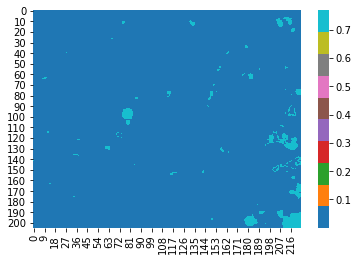

In [32]:
sns.heatmap(x, cmap = 'tab10')